### Import and warehouse data:

#### Import all the given datasets and explore shape and size of each.  

In [198]:
#linear algebra
import numpy as np
# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
# matplotlib.pyplot plots data
from matplotlib import pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [129]:
normal = pd.read_csv('Part1 - Normal.csv')
normal.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [130]:
normal.shape # Check number of columns and rows in data frame

(100, 7)

In [131]:
typeH = pd.read_csv('Part1 - Type_H.csv')
typeH.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [132]:
typeH.shape # Check number of columns and rows in data frame

(60, 7)

In [133]:
typeS = pd.read_csv('Part1 - Type_S.csv')
typeS.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


In [134]:
typeS.shape # Check number of columns and rows in data frame 

(150, 7)

#### Merge all datasets onto one and explore final shape and size. 

In [135]:
from functools import reduce
data_frames = [normal,typeH,typeS]
data = reduce(lambda  left,right: pd.merge(left,right,how='outer'), data_frames)
data.shape

(310, 7)

In [136]:
# Top 10 rows of the dataset
data.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


### Data cleansing:

#### Explore and if required correct the datatypes of each attribute

In [137]:
#describe dataset
data.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [138]:
#checking info to see if there are any null values and what is the data type
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 19.4+ KB


#### Explore for null values in the attributes and if required drop or impute values.  

In [139]:
data.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [140]:
data.nunique()

P_incidence    310
P_tilt         310
L_angle        280
S_slope        281
P_radius       310
S_Degree       310
Class            6
dtype: int64

In [141]:
data.Class.value_counts()

Type_S    133
Normal     73
Type_H     37
Nrmal      27
type_h     23
tp_s       17
Name: Class, dtype: int64

In [142]:
cleanup = {'Class':{'Type_S': 0,'Normal': 1,'Type_H': 2,'Nrmal': 1,'type_h': 2,'tp_s': 0}}

In [143]:
data.replace(cleanup,inplace= True)

### Data analysis & visualisation: 

#### Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.  

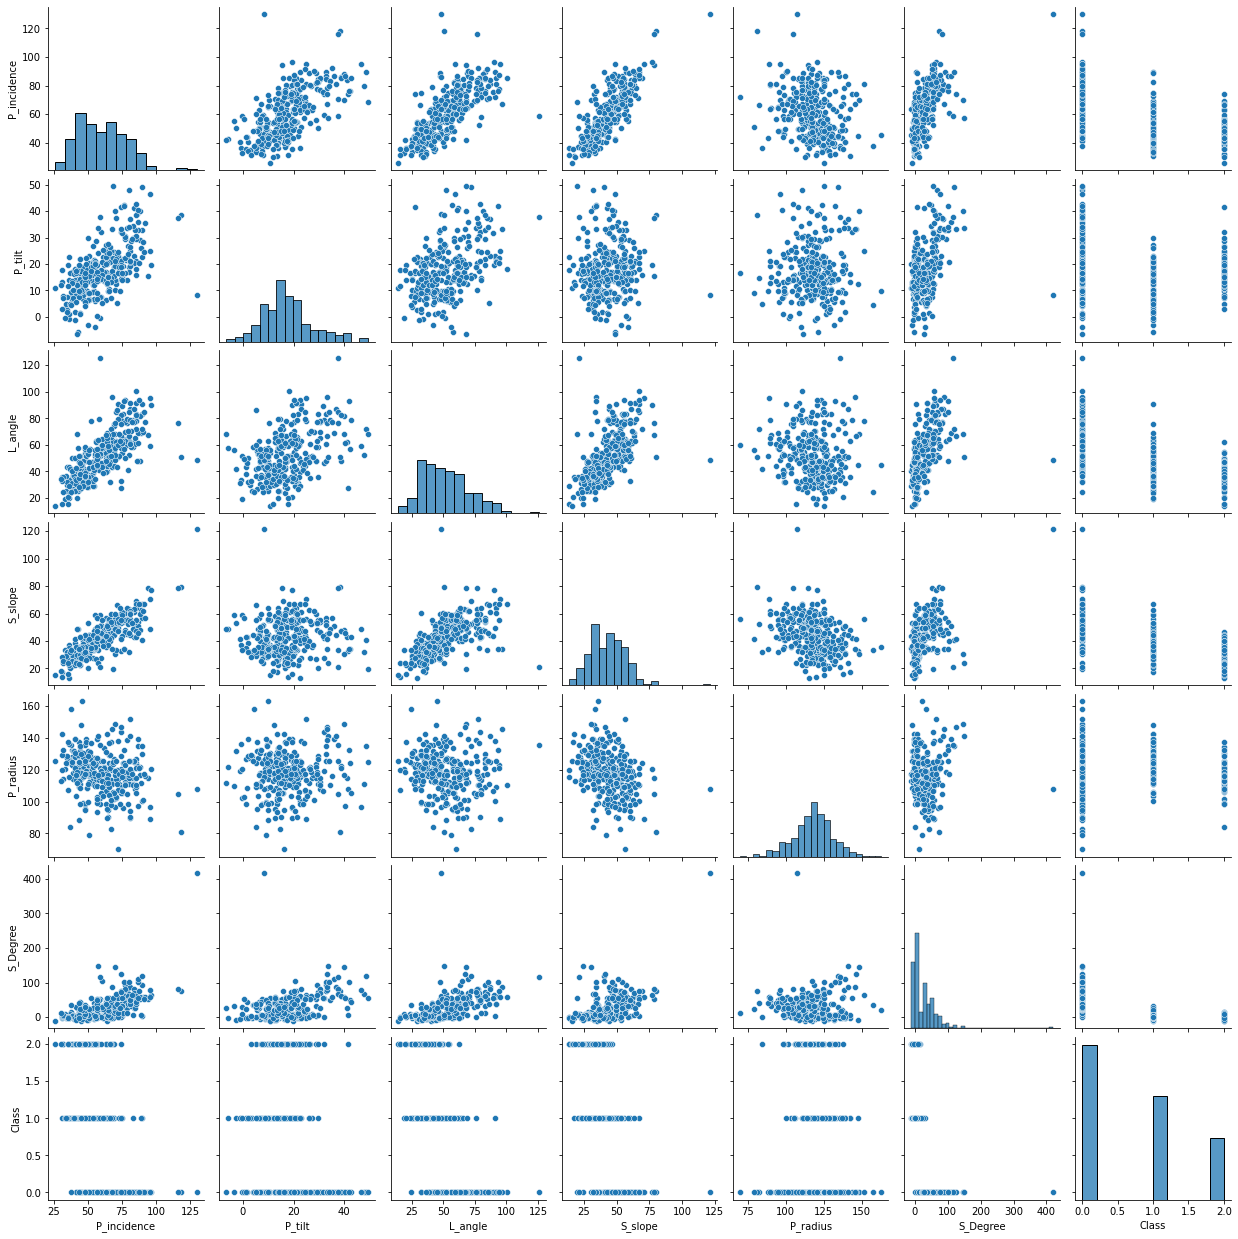

In [144]:
sns.pairplot(data)

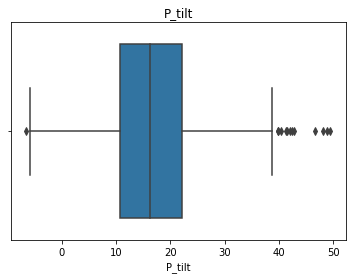

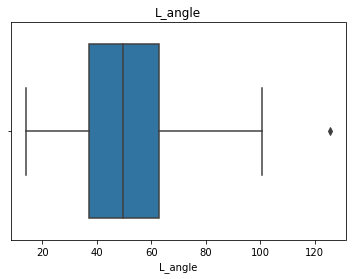

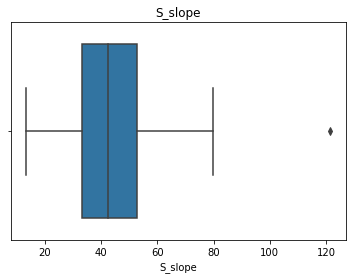

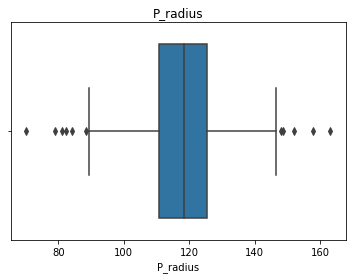

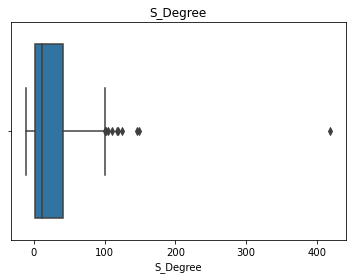

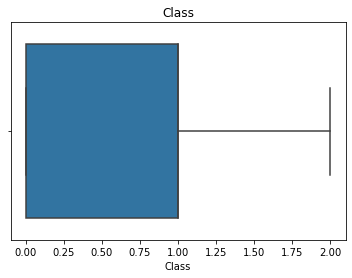

In [145]:
for values in data.columns[1:]:
    sns.boxplot(data[values])
    plt.title(values)
    plt.show()

In [146]:
#Removing outliers using IQR
for values in ['P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree']:
    
    q1 = np.percentile( data[values], 25, interpolation = 'midpoint')
    q3 = np.percentile( data[values], 75, interpolation = 'midpoint')
    
    iqr= q3-q1
    
    data.drop(data[(data[values]>=(q3+1.5*iqr))|(data[values]<=(q3-1.5*iqr))].index,inplace=True)

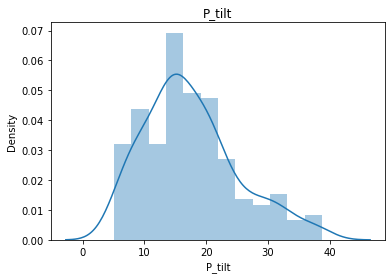

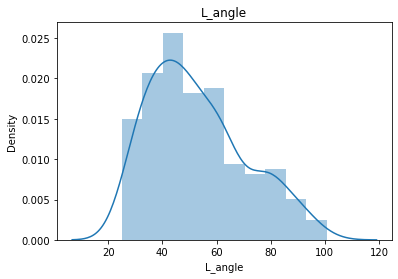

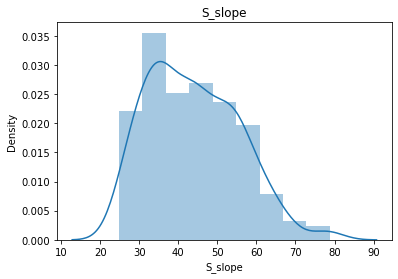

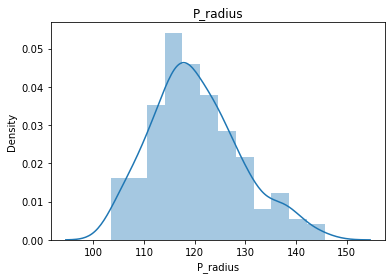

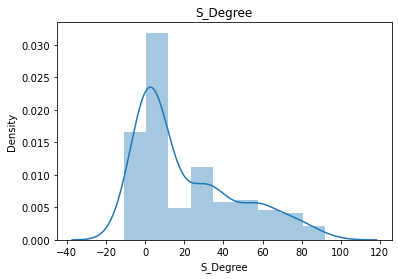

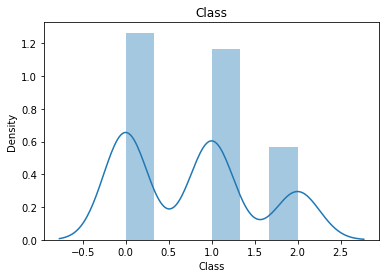

In [147]:
for values in data.columns[1:]:
    sns.distplot(data[values])
    plt.title(values)
    plt.show()

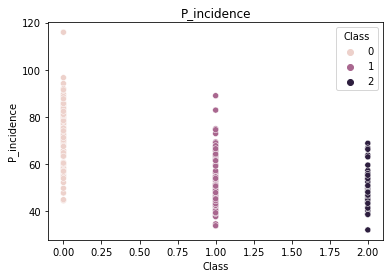

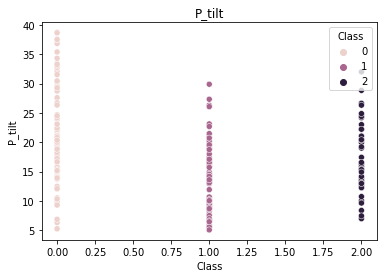

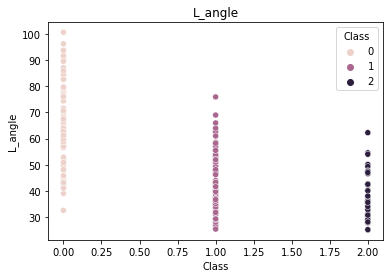

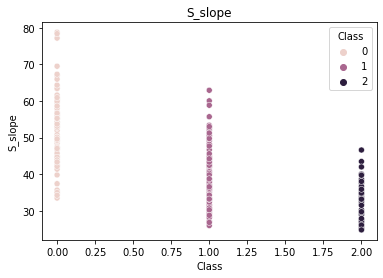

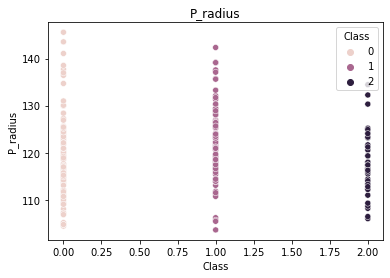

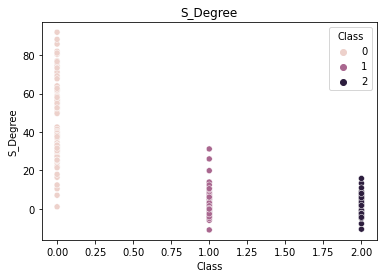

In [148]:
for values in data.columns[:-1]:
    sns.scatterplot(y=data[values],x=data['Class'],hue=data['Class'])
    plt.title(values)
    plt.show()

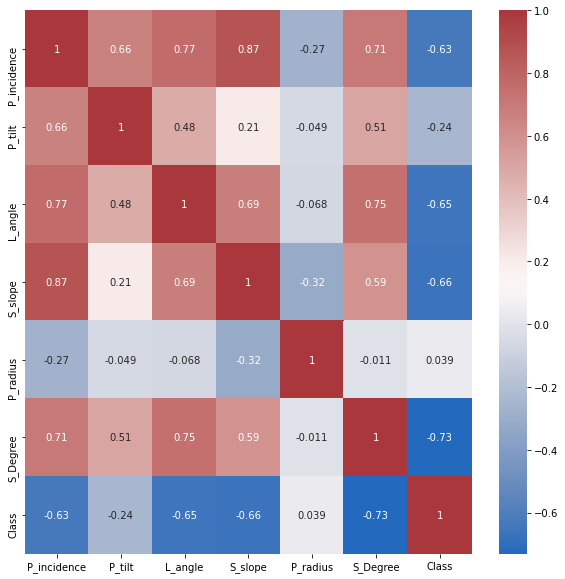

In [149]:
data_corr = data.corr()

# displaying heatmap
%matplotlib inline
plt.figure(figsize=(10, 10))
dataplot = sns.heatmap(data_corr,
                       cmap="vlag",
                       annot=True)

plt.show()

In [150]:
#describe dataset
data.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,61.311844,17.471010,52.883311,43.840833,120.228427,21.048653,0.767773
std,15.176425,7.596278,17.808553,11.636047,8.738718,25.535593,0.748398
min,32.090987,5.073991,25.015378,24.775141,103.582540,-11.058179,0.000000
25%,48.909228,12.738655,39.000000,34.617649,114.289429,1.582976,0.000000
50%,59.785265,16.489091,49.775534,42.997467,119.237007,7.439870,1.000000
75%,72.391518,21.122577,63.007348,52.895151,125.301927,37.190810,1.000000
max,115.923261,38.750670,100.744220,78.794052,145.601033,92.027277,2.000000


### Model training, testing and tuning: 

#### Design and train a KNN classifier. 

In [151]:
x = data.drop(columns='Class')
y = pd.DataFrame(data['Class'])

In [152]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=10)

In [153]:
#importing logestice recursion
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

Minimum error:- 0.6171875 at K = 10


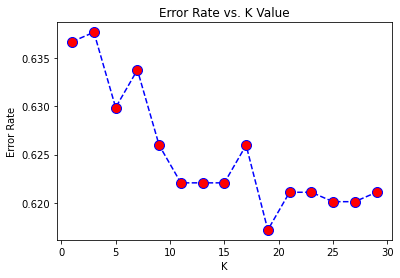

In [161]:
#### Finding K through Iteration
from sklearn.neighbors import KNeighborsClassifier

error = []

for i in range(1,30,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    preds = knn.predict(x_test)
    error.append(np.mean(preds != np.array(y_test)))

#plt.figure(figsize=(10,6))
plt.plot(range(1,30,2),error,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

In [156]:
error

[0.63671875,
 0.6376953125,
 0.6298828125,
 0.6337890625,
 0.6259765625,
 0.6220703125,
 0.6220703125,
 0.6220703125,
 0.6259765625,
 0.6171875,
 0.62109375,
 0.62109375,
 0.6201171875,
 0.6201171875,
 0.62109375]

In [162]:
from sklearn.neighbors import KNeighborsClassifier
k = 10  
classifier = KNeighborsClassifier(n_neighbors = k)
classifier.fit(x_train, y_train)

#Predict the results
y_pred = classifier.predict(x_test)

In [163]:
#Confusion Matrix to check the accuracy score
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
labels =['Pr 0', 'Pr 1','Pr 2']
print(*labels)
for line in cm:
    print(*line)

Pr 0 Pr 1 Pr 2
20 3 1
2 22 4
0 8 4


#### Display the classification accuracies for train and test data.  

In [164]:
#### Lets take a look at the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        24
           1       0.67      0.79      0.72        28
           2       0.44      0.33      0.38        12

    accuracy                           0.72        64
   macro avg       0.67      0.65      0.66        64
weighted avg       0.72      0.72      0.71        64



#### Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained model with  your comments for selecting this model. 

In [175]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
model = GaussianNB()

model.fit(x_train, np.array(y_train).ravel())

GaussianNB()

In [176]:
data_train_predict = model.predict(x_train)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, data_train_predict)))
print()

Model Accuracy: 0.8027



In [178]:
from sklearn import svm
clf = svm.SVC(gamma=0.025, C=3)
clf.fit(x_train , y_train)

SVC(C=3, gamma=0.025)

In [179]:
y_pred = clf.predict(x_test)

In [195]:
clf.score(x_test , y_test)

0.828125

In [196]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5  intercept
0  0.359296 -0.056861  0.507614  0.516868 -0.150453  3.187008   0.242947
1  0.181263 -0.692114 -0.020704  0.719560  0.912425 -2.569866  -1.284312
2 -0.488154  0.975230 -0.603917 -1.323245 -0.951707 -0.635965  -2.464034


In [197]:
model_score = model.score(x_test, y_test)
print(model_score)

0.859375


### Conclusion

In [ ]:
Based on accuracy of various models looks below:
    KNN - 72%
    naive_bayes - 80%
    svm - 82%
    LogisticRegression - 85%
    
The LogisticRegression has the highest accuracy compared to the other models. So this is the best fit for this dataset.

END